In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import wordnet

import matplotlib.pyplot as plt
import json
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances

In [4]:
df=pd.read_csv('..//data//tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [8]:
data=df.iloc[0]
data

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                        150.438
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [10]:
data.genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [11]:
j=json.loads(data.genres)
j

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [12]:
' '.join(''.join(jj['name'].split())for jj in j)

'Action Adventure Fantasy ScienceFiction'

In [26]:
# convert all genres into one string

def genre_to_string(row):
    genres=json.loads(row.genres)
    genres=' '.join(''.join(j['name'].split()) for j in genres)
    
    keywords=json.loads(row.keywords)
    keywords=' '.join(''.join(j['name'].split())for j in keywords)
    
    return (f'{genres} {keywords}')

In [27]:
df['string']=df.apply(genre_to_string,axis=1)

In [29]:
df.string

0       Action Adventure Fantasy ScienceFiction cultur...
1       Adventure Fantasy Action ocean drugabuse exoti...
2       Action Adventure Crime spy basedonnovel secret...
3       Action Crime Drama Thriller dccomics crimefigh...
4       Action Adventure ScienceFiction basedonnovel m...
                              ...                        
4798    Action Crime Thriller unitedstates–mexicobarri...
4799                                      Comedy Romance 
4800    Comedy Drama Romance TVMovie date loveatfirsts...
4801                                                     
4802      Documentary obsession camcorder crush dreamgirl
Name: string, Length: 4803, dtype: object

In [31]:
tfidf=TfidfVectorizer(max_features = 3000)

In [32]:
X=tfidf.fit_transform(df.string)

In [33]:
X

<4803x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 40451 stored elements in Compressed Sparse Row format>

In [34]:
# generate mapping from movie title->index
movie2idx=pd.Series(df.index,index=df.title)
movie2idx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [36]:
idx=movie2idx['Avatar']
idx

0

In [37]:
query=X[idx]
query

<1x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 23 stored elements in Compressed Sparse Row format>

In [38]:
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [42]:
scores=cosine_similarity(query,X)
scores

array([[1.        , 0.03194434, 0.03414396, ..., 0.01368462, 0.        ,
        0.        ]])

In [43]:
scores=scores.flatten()


In [44]:
scores

array([1.        , 0.03194434, 0.03414396, ..., 0.01368462, 0.        ,
       0.        ])

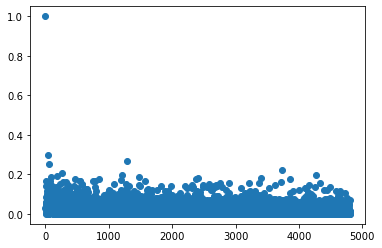

In [50]:
plt.scatter(df.index,scores)

In [51]:
(-scores).argsort()

array([   0,   47, 1287, ..., 2570, 2574, 4802], dtype=int64)

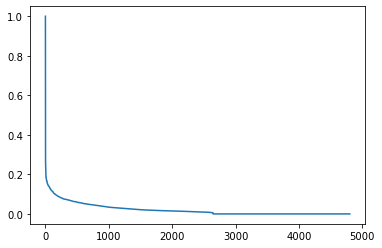

In [56]:
plt.plot(scores[(-scores).argsort()])

In [59]:
recommended=(-scores).argsort()[1:6]
recommended

array([  47, 1287,   61, 3730,  260], dtype=int64)

In [60]:
df['title'].iloc[recommended]

47      Star Trek Into Darkness
1287         A Monster in Paris
61            Jupiter Ascending
3730                      Cargo
260                Ender's Game
Name: title, dtype: object

In [76]:
# create function
def recommendation(title):
    # get the row of title in the dataframe
    idx=movie2idx[title]
    if type(idx)==pd.Series:
        idx=idx.iloc[0]
    
    # calculate pairwise
    query=X[idx]
    scores=cosine_similarity(query,X)
    
    scores=scores.flatten()
    recommended = (-scores).argsort()[1:6]
    
    return df.title.iloc[recommended]

In [80]:
print(f'recommendation for Avatar is \n{recommendation("Avatar")}')

recommendation for Avatar is 
47      Star Trek Into Darkness
1287         A Monster in Paris
61            Jupiter Ascending
3730                      Cargo
260                Ender's Game
Name: title, dtype: object


In [81]:
print(f'recommendation for Cargo is \n{recommendation("Cargo")}')

recommendation for Cargo is 
2891      The Life Before Her Eyes
3405    Stargate: The Ark of Truth
1271                      Pandorum
2909            The Cry of the Owl
4449            London to Brighton
Name: title, dtype: object


In [62]:
idx.iloc[0]

AttributeError: 'numpy.int64' object has no attribute 'iloc'